In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_euca_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Eucalyptol
0,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.0
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
2,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,8,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42956,0.038338,0.015059,-0.011836,-0.010530,-0.029754,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42956,0.038338,0.015059,-0.011836,-0.010530,-0.029754,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Eucalyptol'], axis = 1)
y = df_rf[['X..Eucalyptol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<Axes: ylabel='Count'>

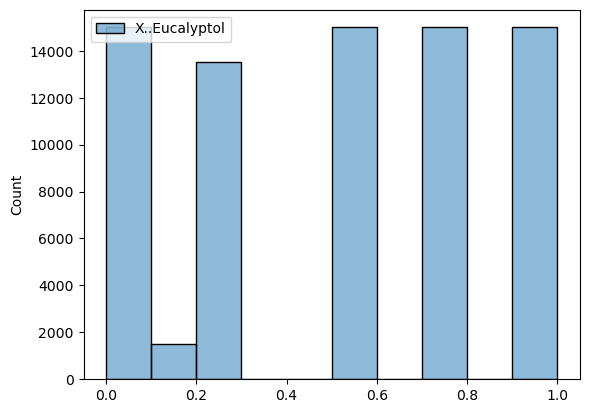

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3654/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.026222909172140763

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.007938378451742868

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.0890975782596972

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9858614858731269

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9374727148641848

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.084729
1,lsa_1,0.072315
2,lsa_2,0.079374
3,lsa_3,0.103211
4,lsa_4,0.087760
...,...,...
81,tree,0.000536
82,tropical,0.002971
83,vanilla,0.000558
84,violet,0.000297


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
50,diesel,0.141967
3,lsa_3,0.103211
4,lsa_4,0.087760
0,lsa_0,0.084729
2,lsa_2,0.079374
1,lsa_1,0.072315
58,lemon,0.070834
6,indica,0.066992
5,hybrid,0.035672
51,earthy,0.013158


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([8.44425051e-02, 7.13750220e-02, 8.01158715e-02, 1.03341048e-01,
       9.00248664e-02, 3.66326859e-02, 6.72915426e-02, 9.70718760e-03,
       1.79671509e-04, 2.62715576e-03, 3.73984642e-03, 0.00000000e+00,
       7.93669443e-03, 1.41381909e-04, 3.22652287e-03, 4.94322278e-03,
       7.69309256e-03, 7.02595276e-03, 0.00000000e+00, 9.49363481e-03,
       0.00000000e+00, 0.00000000e+00, 6.03200346e-03, 7.51134239e-03,
       8.45960519e-03, 2.59172593e-03, 5.91146754e-03, 1.12044573e-04,
       0.00000000e+00, 2.29220624e-03, 1.09305494e-02, 0.00000000e+00,
       5.66548875e-03, 0.00000000e+00, 0.00000000e+00, 5.22987863e-03,
       4.15059238e-03, 7.51500838e-03, 1.74276268e-03, 1.33883965e-03,
       8.91446689e-04, 7.43669807e-03, 1.80382778e-03, 8.59804497e-03,
       2.75421716e-04, 4.50211883e-03, 1.78200057e-03, 3.10736401e-04,
       7.73936678e-03, 1.56225066e-03, 1.41608624e-01, 1.33580328e-02,
       4.17587626e-03, 1.25661484e-03, 4.16073780e-03, 9.88403428e-04,
      

In [23]:
selector.threshold_

0.01162790697674419

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,diesel,earthy,lemon
0,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0
2,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,0
4,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74995,0.038338,0.015059,-0.011836,-0.010530,-0.029754,0,1,0,0,0
74996,0.038338,0.015059,-0.011836,-0.010530,-0.029754,0,1,0,0,0
74997,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0
74998,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_euca.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_euca.pkl")

['selected_X_rf_lsa_elbow_euca.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3654/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.028029262312360526

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.008580221461090842

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09262948483658344

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9798065234436948

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9320664902603017

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_euca.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_euca.pkl")

['rscv_rf_lsa_elbow_best_params_euca.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3654/2184570997.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.027761951996254378

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.007540078614454937

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08683362605842818

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9812733387615648

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9403017735246144

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_euca.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_euca.pkl")

['y_test_rfreg_lsa_elbow_euca.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.027817701903462215

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.008092203116273879

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.08995667355051475

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9355702252441551

Error analysis

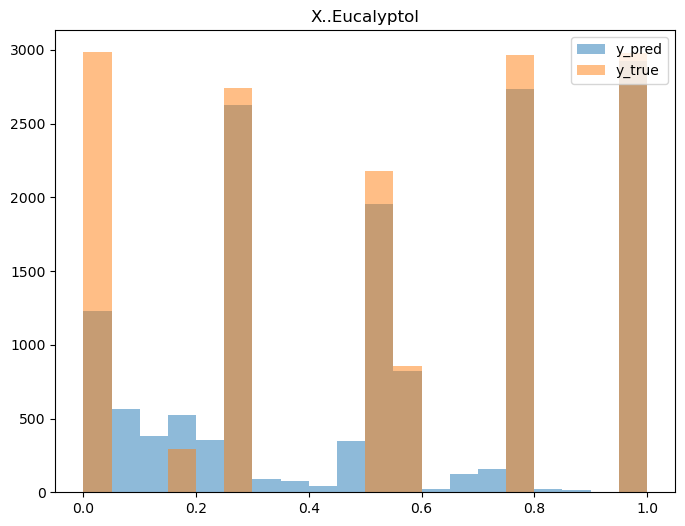

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Eucalyptol"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_euca.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.970
P-value: 0.000


<Axes: >

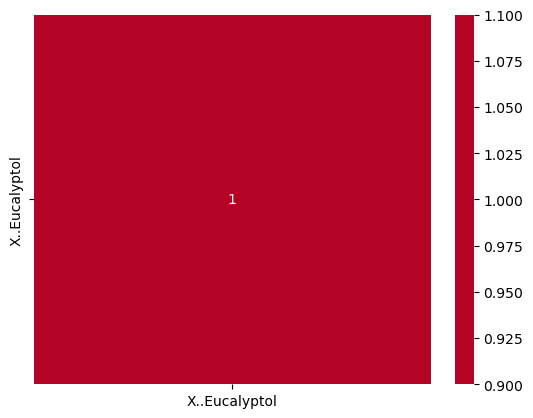

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)